In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
%matplotlib inline

In [83]:
tax_all = pd.read_csv('TaxInfo.csv')

In [ ]:
tax_df1 = pd.read_csv('TaxInfo.csv')

In [4]:
tax_df1 = pd.get_dummies(tax_df, columns=['PoliticalParty'])

In [5]:
tax_df1['Married'] = tax_df1['Married'].astype('category')
tax_df1['Democrat'] = tax_df1['PoliticalParty_Democrat'].astype('category')
tax_df1['Independent'] = tax_df1['PoliticalParty_Independent'].astype('category')
tax_df1['Republican'] = tax_df1['PoliticalParty_Republican'].astype('category')
tax_df1['Filed_2017'] = tax_df1['Filed_2017'].astype('category')
tax_df1['Filed_2016'] = tax_df1['Filed_2016'].astype('category')
tax_df1['Filed_2015'] = tax_df1['Filed_2015'].astype('category')

In [6]:
tax_df1 = pd.get_dummies(tax_df1, columns=['Married'])

In [7]:
tax_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   HHI                         1004 non-null   int64   
 1   HHDL                        1004 non-null   int64   
 2   CollegGrads                 1004 non-null   int64   
 3   AHHAge                      1004 non-null   int64   
 4   Cars                        1004 non-null   int64   
 5   Filed_2017                  1004 non-null   category
 6   Filed_2016                  1004 non-null   category
 7   Filed_2015                  1004 non-null   category
 8   PoliticalParty_Democrat     1004 non-null   uint8   
 9   PoliticalParty_Independent  1004 non-null   uint8   
 10  PoliticalParty_Republican   1004 non-null   uint8   
 11  Democrat                    1004 non-null   category
 12  Independent                 1004 non-null   category
 13  Republican        

In [8]:
tax_df1 = tax_df1.drop(columns=['PoliticalParty_Democrat', 'PoliticalParty_Republican', 'PoliticalParty_Independent', 'Married_2'])

In [9]:
tax_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   HHI          1004 non-null   int64   
 1   HHDL         1004 non-null   int64   
 2   CollegGrads  1004 non-null   int64   
 3   AHHAge       1004 non-null   int64   
 4   Cars         1004 non-null   int64   
 5   Filed_2017   1004 non-null   category
 6   Filed_2016   1004 non-null   category
 7   Filed_2015   1004 non-null   category
 8   Democrat     1004 non-null   category
 9   Independent  1004 non-null   category
 10  Republican   1004 non-null   category
 11  Married_0    1004 non-null   uint8   
 12  Married_1    1004 non-null   uint8   
dtypes: category(6), int64(5), uint8(2)
memory usage: 47.9 KB


In [10]:
tax_df1['Married_0'] = tax_df1['Married_0'].astype('category')
tax_df1['Married_1'] = tax_df1['Married_1'].astype('category')

In [11]:
tax_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   HHI          1004 non-null   int64   
 1   HHDL         1004 non-null   int64   
 2   CollegGrads  1004 non-null   int64   
 3   AHHAge       1004 non-null   int64   
 4   Cars         1004 non-null   int64   
 5   Filed_2017   1004 non-null   category
 6   Filed_2016   1004 non-null   category
 7   Filed_2015   1004 non-null   category
 8   Democrat     1004 non-null   category
 9   Independent  1004 non-null   category
 10  Republican   1004 non-null   category
 11  Married_0    1004 non-null   category
 12  Married_1    1004 non-null   category
dtypes: category(8), int64(5)
memory usage: 48.2 KB


In [12]:
#Create democratic predictor data
tax_dem = tax_df1.drop(columns=['Independent', 'Republican'])

In [13]:
tax_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   HHI          1004 non-null   int64   
 1   HHDL         1004 non-null   int64   
 2   CollegGrads  1004 non-null   int64   
 3   AHHAge       1004 non-null   int64   
 4   Cars         1004 non-null   int64   
 5   Filed_2017   1004 non-null   category
 6   Filed_2016   1004 non-null   category
 7   Filed_2015   1004 non-null   category
 8   Democrat     1004 non-null   category
 9   Married_0    1004 non-null   category
 10  Married_1    1004 non-null   category
dtypes: category(6), int64(5)
memory usage: 46.0 KB


In [14]:
tax_rep = tax_df1.drop(columns=['Independent', 'Democrat'])

In [15]:
tax_ind = tax_df1.drop(columns=['Republican', 'Democrat'])

## Dem Model

In [218]:
outcome = 'Democrat'
predictors = [c for c in tax_dem.columns if c != outcome]

X = tax_dem[predictors]
Y = tax_dem[outcome]

train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=21)

In [219]:
categorical_cols = train_X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = train_X.select_dtypes(include=['number']).columns.tolist()

all_cols = train_X.columns.tolist()

### Logistic Model

In [220]:
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l2', C=10, solver='saga', max_iter=500)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [221]:
# Further partition our training data into train and test sets to use for model fitting and testing

# Fit model on new training data - notice that clf is actually the Pipeline
clf.fit(train_X, train_Y)

print(f"Training score: {clf.score(train_X, train_Y):.3f}")
print(f"Test score: {clf.score(valid_X, valid_Y):.3f}")

Training score: 0.664
Test score: 0.657


/Users/andrewklooster/opt/anaconda3/envs/aap/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [222]:
def coef_plot(model, title=None):
    fig, ax = plt.subplots(3, sharex=True)
       
    if title:
        ax[0].set_title(title)

    for i in range(3):
        ax[i].plot(model.steps[1][1].coef_[i])

IndexError: index 1 is out of bounds for axis 0 with size 1

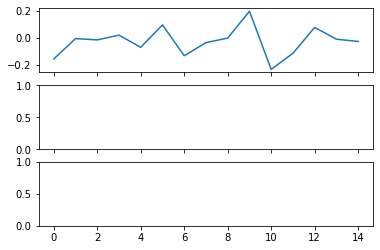

In [223]:
coef_plot(clf)

### Random Forest Model - Democrat

In [111]:
# Append random forest classifier to preprocessing pipeline.
clf_dem_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=0))])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

clf_dem_rf.fit(X_train, y_train)

print(f"Training score: {clf_dem_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_dem_rf.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.602


In [112]:
clf_dem_rf_predictions = clf_dem_rf.predict(X_test)

In [113]:
clf_dem_rf_predictions1 = clf_dem_rf.predict_proba(X_test)

In [114]:
clf_dem_results = pd.DataFrame(clf_dem_rf_predictions1, columns=['a', 'Dem_probability'])

In [115]:
submit_dict = {'id': X_test.index,
              'Dem_probability': clf_dem_results['Dem_probability']}

In [116]:
clf_RF_results1 = pd.DataFrame(submit_dict, columns=['id', 'Dem_probability'])

In [117]:
clf_RF_results1.head()

,id,Dem_probability
0,213,0.28
1,553,0.35
2,187,0.38
3,777,0.43
4,828,0.34


### Random Forest Model - Independent

In [118]:
outcome = 'Independent'
predictors = [c for c in tax_ind.columns if c != outcome]

X = tax_ind[predictors]
Y = tax_ind[outcome]
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=21)

In [119]:
categorical_cols = train_X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = train_X.select_dtypes(include=['number']).columns.tolist()

all_cols = train_X.columns.tolist()

In [120]:
# Append random forest classifier to preprocessing pipeline.
clf_ind_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=0))])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

clf_ind_rf.fit(X_train, y_train)

print(f"Training score: {clf_ind_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_ind_rf.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.642


In [121]:
clf_ind_rf_predictions1 = clf_ind_rf.predict_proba(X_test)
clf_ind_results = pd.DataFrame(clf_ind_rf_predictions1, columns=['a', 'Ind_probability'])

In [122]:
clf_ind_results.head()

,a,Ind_probability
0,0.49,0.51
1,0.64,0.36
2,0.85,0.15
3,0.83,0.17
4,0.74,0.26


In [123]:
clf_RF_results2 = pd.merge(clf_RF_results1,clf_ind_results['Ind_probability'], left_index = True, right_index = True)
clf_RF_results2.head()

,id,Dem_probability,Ind_probability
0,213,0.28,0.51
1,553,0.35,0.36
2,187,0.38,0.15
3,777,0.43,0.17
4,828,0.34,0.26


### Random Forest Model - Republican

In [235]:
outcome = 'Republican'
predictors = [c for c in tax_rep.columns if c != outcome]

X = tax_rep[predictors]
Y = tax_rep[outcome]
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=21)

In [236]:
categorical_cols = train_X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = train_X.select_dtypes(include=['number']).columns.tolist()

all_cols = train_X.columns.tolist()

In [237]:
# Append random forest classifier to preprocessing pipeline.
clf_rep_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=21))])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

clf_rep_rf.fit(X_train, y_train)

print(f"Training score: {clf_rep_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rep_rf.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.662


In [127]:
clf_rep_rf_predictions1 = clf_rep_rf.predict_proba(X_test)
clf_rep_results = pd.DataFrame(clf_rep_rf_predictions1, columns=['a', 'Rep_probability'])

In [128]:
clf_RF_results3 = pd.merge(clf_RF_results2,clf_rep_results['Rep_probability'], left_index = True, right_index = True)
clf_RF_results3.head()

,id,Dem_probability,Ind_probability,Rep_probability
0,213,0.28,0.51,0.21
1,553,0.35,0.36,0.23
2,187,0.38,0.15,0.37
3,777,0.43,0.17,0.52
4,828,0.34,0.26,0.44


In [135]:
tax_all.iloc[213][:]

HHI                 288968
HHDL               -211093
Married                  2
CollegGrads              1
AHHAge                  25
Cars                     0
Filed_2017               0
Filed_2016               1
Filed_2015               1
PoliticalParty    Democrat
Name: 213, dtype: object

In [105]:
outcome = 'PoliticalParty'
predictors = [c for c in tax_all.columns if c != outcome]

X = tax_all[predictors]
Y = tax_all[outcome]
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=21)

In [129]:
valid_Y

213    0
553    0
187    1
777    1
828    0
      ..
360    0
732    1
488    1
855    0
379    1
Name: Republican, Length: 201, dtype: category
Categories (2, uint64): [0, 1]

In [ ]:
vali

In [131]:
clf_RF_results4 = pd.merge(clf_RF_results3, tax_all['PoliticalParty'], left_on = 'id', right_index = True)

In [132]:
clf_RF_results4.head()

,id,Dem_probability,Ind_probability,Rep_probability,PoliticalParty
0,213,0.28,0.51,0.21,Democrat
1,553,0.35,0.36,0.23,Independent
2,187,0.38,0.15,0.37,Republican
3,777,0.43,0.17,0.52,Republican
4,828,0.34,0.26,0.44,Democrat


In [146]:
l = []
for index,row in clf_RF_results4.iterrows():
    if (row['Dem_probability'] > row['Ind_probability']) and (row['Dem_probability'] > row['Rep_probability']):
        l.append([index, 'Democrat'])
    elif (row['Ind_probability'] > row['Dem_probability']) and (row['Ind_probability'] > row['Rep_probability']):
        l.append([index, 'Independent'])
    else:
        l.append([index, 'Republican'])

In [148]:
results = pd.DataFrame(l, columns=['a', 'Cummulative_Predict'])

In [149]:
results

,a,Cummulative_Predict
0,0,Independent
1,1,Independent
2,2,Democrat
3,3,Republican
4,4,Republican
...,...,...
196,196,Democrat
197,197,Democrat
198,198,Democrat
199,199,Independent


In [150]:
clf_RF_results5 = pd.merge(clf_RF_results4, results['Cummulative_Predict'], left_index = True, right_index = True)

In [151]:
clf_RF_results5

,id,Dem_probability,Ind_probability,Rep_probability,PoliticalParty,Cummulative_Predict
0,213,0.28,0.51,0.21,Democrat,Independent
1,553,0.35,0.36,0.23,Independent,Independent
2,187,0.38,0.15,0.37,Republican,Democrat
3,777,0.43,0.17,0.52,Republican,Republican
4,828,0.34,0.26,0.44,Democrat,Republican
...,...,...,...,...,...,...
196,360,0.46,0.29,0.28,Democrat,Democrat
197,732,0.36,0.32,0.29,Republican,Democrat
198,488,0.61,0.22,0.29,Republican,Democrat
199,855,0.40,0.42,0.11,Democrat,Independent


In [154]:
count = []
for index, row in clf_RF_results5.iterrows(): 
    if row['PoliticalParty'] == row['Cummulative_Predict']:
        count.append(1)
    else:
        count.append(0)

In [157]:
sum(count) / 201

0.3383084577114428

### Neural Network Model - Republican

In [227]:
outcome = 'Republican'
predictors = [c for c in tax_rep.columns if c != outcome]

X = tax_rep[predictors]
Y = tax_rep[outcome]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [228]:
X.head()

,HHI,HHDL,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015,Married_0,Married_1
0,49685,227187,0,105,0,1,1,1,1,0
1,64756,-507342,3,68,3,1,0,0,0,0
2,115435,521290,3,81,2,0,1,0,0,1
3,99454,251829,1,52,4,1,0,0,0,0
4,157274,-472337,1,28,1,1,0,1,1,0


In [229]:
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

all_cols = X_train.columns.tolist()

In [234]:
# Append random forest classifier to preprocessing pipeline.
clf_rep_nn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPClassifier(hidden_layer_sizes=(10, 10), activation = 'logistic', solver = 'lbfgs', max_iter = 10000, random_state = 0))])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

clf_rep_nn.fit(X_train, y_train)

print(f"Training score: {clf_rep_nn.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rep_nn.score(X_test, y_test):.3f}")

Training score: 0.874
Test score: 0.642
